In [39]:
#Analysis is carried out on a marketing campaign dataset based on a case of a
#retailer company in computer accessories. The dataset consists of 19 variables and 1500 cases.
#The data will first be prepared by identifying missing values and errors in data entry. The
#variables which are not related to the analysis will be eliminated and some variable will be
#transformed according to the needs of the analysis. After preparing the data, Python
#programmes will be developed to analyse the summary statistics, correlation and Euclidean
#distance. Finally, a logistic regression model will be built using Python and the model will be
#checked for adequacy.

#Loading the library
import pandas as pd
import numpy as np

#Loading the data
data= pd.read_csv('Marketing Campaign data.csv')


In [40]:
# obtain a summary statistics, from which the min value can be 
#observed to check for missing values for certain variables.
data.describe() 

,CUST_ID,AGE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000
mean,102250.500000,38.892000,4.088667,0.253333,0.6280,0.582000,0.575333,0.880667,1.0,0.286667,0.002000
std,433.157015,13.636384,1.920919,0.435065,0.4835,0.493395,0.494457,0.324288,0.0,0.452355,0.044692
min,101501.000000,17.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,101875.750000,28.000000,3.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
50%,102250.500000,37.000000,4.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
75%,102625.250000,47.000000,5.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,103000.000000,90.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [41]:
# checking for empty entry in the dataset
data.isnull().sum() 

CUST_ID                     0
CUST_GENDER                 0
AGE                         0
CUST_MARITAL_STATUS         0
COUNTRY_NAME                0
CUST_INCOME_LEVEL           0
EDUCATION                   0
OCCUPATION                  0
HOUSEHOLD_SIZE              0
YRS_RESIDENCE               0
AFFINITY_CARD               0
BULK_PACK_DISKETTES         0
FLAT_PANEL_MONITOR          0
HOME_THEATER_PACKAGE        0
BOOKKEEPING_APPLICATION     0
PRINTER_SUPPLIES            0
Y_BOX_GAMES                 0
OS_DOC_SET_KANJI            0
COMMENTS                   73
dtype: int64

In [42]:
#It was observed that the variable ‘OCCUPATION' has missing values which were recorded as ‘?'.
#This cannot be used in the analysis and hence these cases have to be deleted. 
#The variable ‘COMMENTS’ have missing values, these cases will not be removed as it was decided
#that variable would be eliminated.
# Deleting '?' in variable OCCUPATION and NAN values
data=data.replace({'?':np.nan}).dropna()
# altenative method to droping NAN values
#data1 = data[~pd.isnull(data)] 

In [43]:
# Dropping variables
data=data.drop(['PRINTER_SUPPLIES','COMMENTS','OS_DOC_SET_KANJI'],axis=1)
data
# alternative method
#list_drop = ['PRINTER_SUPPLIES','COMMENTS','OS_DOC_SET_KANJI']
#data.drop(list_drop, axis=1, inplace=True)

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,Y_BOX_GAMES
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,0
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,0
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,102996,M,17,NeverM,United States of America,"C: 50,000 - 69,999",10th,Other,1,1,0,0,0,0,0,1
1496,102997,M,41,Married,Spain,"L: 300,000 and above",Bach.,Exec.,3,4,0,1,1,1,1,0
1497,102998,M,53,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,8,1,1,1,1,1,0
1498,102999,M,55,Married,United States of America,"C: 50,000 - 69,999",HS-grad,Cleric.,3,7,1,0,0,1,1,0


In [44]:
## Variable transformation
# changing customer gender into 1 and 0 for M and F respectively
gender = {'M': 1,'F': 0}
data.CUST_GENDER = [gender[item] for item in data.CUST_GENDER]
################################################################################
# Checking frequency of each country in the data
pd.value_counts(data['COUNTRY_NAME'])
# Country name into ordinal numbers
country_code = { 
                'United States of America':1,
                'Argentina':2,
                'Italy':3,
                'Brazil':4, 
                'Germany':5,
                'Poland':6, 
                'Canada':7,
                'United Kingdom':8,
                'Saudi Arabia':9,
                'Denmark':10,
                'China':11, 
                'Singapore':11,
                'New Zealand':11,
                'Japan':11,
                'Spain':11,
                'Turkey':11,
                'Australia':11,
                'France':11,
                'South Africa':1}
data.COUNTRY_NAME = [country_code[item] for item in data.COUNTRY_NAME]
################################################################################
# Checking number of categories that is already classified
pd.value_counts(data['CUST_INCOME_LEVEL'])
# Customer income level into ordinal
income_level= {
'J: 190,000 - 249,999':4,
'L: 300,000 and above':5,
'I: 170,000 - 189,999':4,
'K: 250,000 - 299,999':4,
'F: 110,000 - 129,999':3,
'G: 130,000 - 149,999':3,
'E: 90,000 - 109,999':2,
'H: 150,000 - 169,999':4,
'B: 30,000 - 49,999':1,
'C: 50,000 - 69,999':2,
'D: 70,000 - 89,999':2,
'A: Below 30,000':1}
data.CUST_INCOME_LEVEL= [income_level[item] for item in data.CUST_INCOME_LEVEL]
################################################################################
# Checking current classification of education
pd.value_counts(data['EDUCATION'])
# Education into ordinal level
education= {
'HS-grad':4, 
'< Bach.':4,
'Bach.':5,
'Masters':5,
'Assoc-V':4,
'Assoc-A':4,
'10th':2,
'11th':3,
'Profsc':5,
'7th-8th':2,
'9th':2,
'PhD':5,
'12th':3,
'5th-6th':1,
'Presch.':1,
'1st-4th':1,}
data.EDUCATION = [education[item] for item in data.EDUCATION]
################################################################################
# Identify how the data entry error was identified by python
pd.value_counts(data['HOUSEHOLD_SIZE'])
# household into ordinal level
household= {'1':1,'2':2,'3':3,'4-5':4, '6-8':5, '9+':6}
data.HOUSEHOLD_SIZE = [household[item] for item in data.HOUSEHOLD_SIZE]
################################################################################
pd.value_counts(data['OCCUPATION'])
occupation= {
'Exec.':1,
'Crafts':2,
'Sales':3,
'Cleric.':4,
'Prof.':5, 
'Other':6,
'Machine':7,
'Transp.':8,
'Handler':9,
'TechSup':10,
'Farming':11,
'Protec.':12,
'House-s':13,    
'Armed-F':14,}
data.OCCUPATION=[occupation[item] for item in data.OCCUPATION]
#################################################################################
pd.value_counts(data['CUST_MARITAL_STATUS'])
marital={
'Married':1,
'NeverM':2,
'Divorc.':3,
'Separ.':4,
'Widowed':5,
'Mabsent':6,
'Mar-AF':7,}
data.CUST_MARITAL_STATUS=[marital[item] for item in data.CUST_MARITAL_STATUS]

In [45]:
#Python code designed to calculate the summary statistics of any variables

#Summary statistics
# create a dictonary for all variables
dic={ 1:'CUST_GENDER',
    2:'AGE',
    3:'CUST_MARITAL_STATUS',
    4:'COUNTRY_NAME',
    5:'CUST_INCOME_LEVEL',
    6:'EDUCATION',
    7:'OCCUPATION',
    8:'HOUSEHOLD_SIZE',
    9:'YRS_RESIDENCE',
    10:'AFFINITY_CARD',
    11:'BULK_PACK_DISKETTES',
    12:'FLAT_PANEL_MONITOR',
    13:'HOME_THEATER_PACKAGE',
    14:'BOOKKEEPING_APPLICATION',
    15:'Y_BOX_GAMES',}
# provide a list of variable number to choose from
print('Choose the variables number from list shown',
    'customer gender          - 1',
    'Age                      - 2',
    'Marital status           - 3',
    'Country name             - 4',
    'Income level             - 5',
    'Education                - 6',
    'Occupation               - 7',
    'Household size           - 8',
    'Yrs residence            - 9',
    'Affinity card            - 10',
    'Bulk Pack Diskettes      - 11',
    'Flat panel monitor       - 12',
    'Home theater package     - 13',
    'Bookkeeping application  - 14',
    'Y box games              - 15',
    sep="\n")  
# store the user choice  
x=int(input(
'Enter the respective number of variable to obtain summary statistics:'))
# Calculation 
SUM=data[dic[x]].sum() 
MEAN=data[dic[x]].mean()
Standard_deviation=data[dic[x]].std()
Skewness=data[dic[x]].skew()
Kurtosis=data[dic[x]].kurt()
print('The sum is %d.' % SUM, 
       'The Mean is %f' %MEAN,
       'The Standard Deviation is %f' %Standard_deviation,
       'The Skewness is %f' % Skewness,
       'The Kurtosis is %f' %Kurtosis,
        sep="\n")

Choose the variables number from list shown
customer gender          - 1
Age                      - 2
Marital status           - 3
Country name             - 4
Income level             - 5
Education                - 6
Occupation               - 7
Household size           - 8
Yrs residence            - 9
Affinity card            - 10
Bulk Pack Diskettes      - 11
Flat panel monitor       - 12
Home theater package     - 13
Bookkeeping application  - 14
Y box games              - 15
Enter the respective number of variable to obtain summary statistics:4
The sum is 1843.
The Mean is 1.364175
The Standard Deviation is 1.448582
The Skewness is 5.002511
The Kurtosis is 26.313792


In [46]:
# Correlation of target variable with other variables
Correlation= data.corr()['AFFINITY_CARD']
print(Correlation.sort_values(ascending=False))
################################################################################
# Euclidean Distance
from scipy.spatial import distance
# prompt to enter Customer ID
Customer_ID_1= int(input(
'Enter ID number of customer:'))
Customer_ID_2= int(input(
'Ebter ID number of next customer:'))
# Euclidean distance calculation
euc_dst= distance.euclidean(data.loc[Customer_ID_1],data.loc[Customer_ID_2])
print('The Euclidean distance is %f.' % euc_dst)
###################################################

AFFINITY_CARD              1.000000
YRS_RESIDENCE              0.355878
EDUCATION                  0.299675
HOME_THEATER_PACKAGE       0.282150
AGE                        0.250049
CUST_GENDER                0.232752
BOOKKEEPING_APPLICATION    0.169069
HOUSEHOLD_SIZE             0.050500
COUNTRY_NAME               0.038701
CUST_INCOME_LEVEL         -0.011094
BULK_PACK_DISKETTES       -0.013852
FLAT_PANEL_MONITOR        -0.025359
CUST_ID                   -0.034516
OCCUPATION                -0.162829
Y_BOX_GAMES               -0.281529
CUST_MARITAL_STATUS       -0.348459
Name: AFFINITY_CARD, dtype: float64
Enter ID number of customer:3
Ebter ID number of next customer:4
The Euclidean distance is 12.165525.


Choose the variables number from list shown
customer gender          - 1
Age                      - 2
Marital status           - 3
Country name             - 4
Income level             - 5
Education                - 6
Occupation               - 7
Household size           - 8
Yrs residence            - 9
Affinity card            - 10
Bulk Pack Diskettes      - 11
Flat panel monitor       - 12
Home theater package     - 13
Bookkeeping application  - 14
Y box games              - 15
Enter the respective number of the variable:4


Text(0.5, 0, 'COUNTRY_NAME')

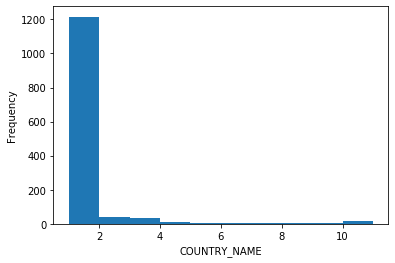

In [47]:
# Histogram for chosen variable
import matplotlib.pyplot as plt

# create a dictonary for all variables
dic={
1:'CUST_GENDER',
2:'AGE',
3:'CUST_MARITAL_STATUS',
4:'COUNTRY_NAME',
5:'CUST_INCOME_LEVEL',
6:'EDUCATION',
7:'OCCUPATION',
8:'HOUSEHOLD_SIZE',
9:'YRS_RESIDENCE',
10:'AFFINITY_CARD',
11:'BULK_PACK_DISKETTES',
12:'FLAT_PANEL_MONITOR',
13:'HOME_THEATER_PACKAGE',
14:'BOOKKEEPING_APPLICATION',
15:'Y_BOX_GAMES',}
# provide a list of variable number to choose from

print('Choose the variables number from list shown',
    'customer gender          - 1',
    'Age                      - 2',
    'Marital status           - 3',
    'Country name             - 4',
    'Income level             - 5',
    'Education                - 6',
    'Occupation               - 7',
    'Household size           - 8',
    'Yrs residence            - 9',
    'Affinity card            - 10',
    'Bulk Pack Diskettes      - 11',
    'Flat panel monitor       - 12',
    'Home theater package     - 13',
    'Bookkeeping application  - 14',
    'Y box games              - 15',
    sep="\n")
    
# store the user choice  
num=int(input('Enter the respective number of the variable:'))

#plot the histogram
data[dic[num]].plot(kind='hist',stacked=True,bins=10)
# label x axis according the user choice
plt.xlabel(dic[num])

Choose the variables number from list shown
customer gender          - 1
Age                      - 2
Marital status           - 3
Country name             - 4
Income level             - 5
Education                - 6
Occupation               - 7
Household size           - 8
Yrs residence            - 9
Affinity card            - 10
Bulk Pack Diskettes      - 11
Flat panel monitor       - 12
Home theater package     - 13
Bookkeeping application  - 14
Y box games              - 15
Enter the respective number of the variable for x axis:4
Enter the respective number of the variable for y axis:3


Text(0, 0.5, 'CUST_MARITAL_STATUS')

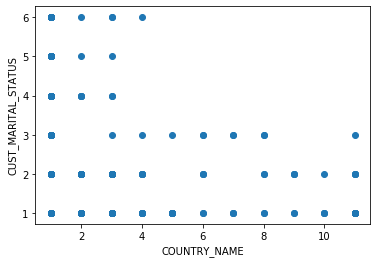

In [48]:
# scatter plot of any 2 chosen variables
# create a dictonary for all variables
dic={
1:'CUST_GENDER',
2:'AGE',
3:'CUST_MARITAL_STATUS',
4:'COUNTRY_NAME',
5:'CUST_INCOME_LEVEL',
6:'EDUCATION',
7:'OCCUPATION',
8:'HOUSEHOLD_SIZE',
9:'YRS_RESIDENCE',
10:'AFFINITY_CARD',
11:'BULK_PACK_DISKETTES',
12:'FLAT_PANEL_MONITOR',
13:'HOME_THEATER_PACKAGE',
14:'BOOKKEEPING_APPLICATION',
15:'Y_BOX_GAMES',}
# provide a list of variable number to choose from

print('Choose the variables number from list shown',
    'customer gender          - 1',
    'Age                      - 2',
    'Marital status           - 3',
    'Country name             - 4',
    'Income level             - 5',
    'Education                - 6',
    'Occupation               - 7',
    'Household size           - 8',
    'Yrs residence            - 9',
    'Affinity card            - 10',
    'Bulk Pack Diskettes      - 11',
    'Flat panel monitor       - 12',
    'Home theater package     - 13',
    'Bookkeeping application  - 14',
    'Y box games              - 15',
    sep="\n")
    
# store the user choice  
x=int(input('Enter the respective number of the variable for x axis:'))
y=int(input('Enter the respective number of the variable for y axis:'))

#plot the scatter plot
plt.scatter(data[dic[x]],data[dic[y]])
# label x and y axis
plt.xlabel(dic[x])
plt.ylabel(dic[y])


In [49]:
# Data modelling LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# classifying explanatory variables into x and target variable into y
y = data.iloc[:,[10]]
X = data.iloc[:,[1,2,3,4,5,6,7,8,9,11,12,13,14,15]]
# spliting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#checking training and test data partition
X_train.shape
X_test.shape
# implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
#checking summary statistics to check for significance of variable
result=logit_model.fit()
print(result.summary())
# Fit logistic regression to the training set
logic = LogisticRegression(random_state=0,max_iter=1000)
logic.fit(X_train, np.ravel(y_train,order='C'))



Optimization terminated successfully.
         Current function value: 0.388416
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          AFFINITY_CARD   No. Observations:                 1013
Model:                          Logit   Df Residuals:                      999
Method:                           MLE   Df Model:                           13
Date:                Tue, 05 May 2020   Pseudo R-squ.:                  0.3180
Time:                        12:38:55   Log-Likelihood:                -393.46
converged:                       True   LL-Null:                       -576.94
Covariance Type:            nonrobust   LLR p-value:                 2.092e-70
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CUST_GENDER                -0.1660      0.243     -0.684      0.494      -0.642   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[221  21]
 [ 53  43]]


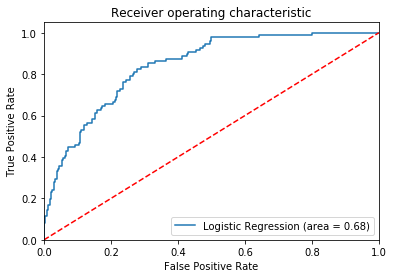

In [50]:
# Predict test set results and confusion matrix
y_pred = logic.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# Accuracy of model
print
('Accuracy on test data:{:.2f}'.format(logic.score(X_test, y_test)))

# Creating ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plot base line
plt.plot([0, 1], [0, 1],'r--')
# Set axis limit for x-axis and y-axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# label axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
# Dispay AUC at lower right
plt.legend(loc="lower right")


In [51]:
# Detailed Explanation can be found in Python.pdf